# Лабораторная работа
## Организация памяти конвейерных суперскалярных электронных вычислительных машин

*Цель работы* - освоение принципов эффективного использования подсистемы
памяти современных универсальных ЭВМ, обеспечивающей хранение и своевременную
выдачу команд и данных в центральное процессорное устройство.

В ходе работы необходимо ознакомиться с теоретическим материалом, касающимся
особенностей функционирования подсистемы памяти современных конвейерных
суперскалярных ЭВМ, изучить средства
идентификации микропроцессоров, провести исследования времени выполнения тестовых
программ, сделать выводы о архитектурных особенностях используемых ЭВМ.

Порядок выполнению лабораторной работы

Задание 1. Ознакомиться с возможностями программы PCLAB в Разделе 2
методических указаний. Запустить программу PCLAB 1.0. Изучить идентификационную
информацию на вкладке «Идентификация процессора».

Задание 2. На основании идентификационной информации о микропроцессоре
ЭВМ, используемой при проведении лабораторной работы, определить следующие
параметры: размер линейки кэш-памяти верхнего уровня и объем физической памяти.
Результаты занести в отчет.

Задание 3. Ознакомиться с описанием эксперимента «Исследование расслоения
динамической памяти» на вкладке «Описание эксперимента». Провести эксперимент. По
результатам эксперимента определить: количество банков динамической памяти; размер
одной страницы динамической памяти; количество страниц в динамической памяти.
Сделать выводы о использованном способе наращивания динамической памяти. Результаты
занести в отчет.

Задание 4. Ознакомиться с описанием эксперимента «Сравнение эффективности
ссылочных и векторных структур данных». Провести эксперимент. По результатам
эксперимента определить: отношение времени работы алгоритма, использующего
зависимые данные, ко времени обработки аналогичного алгоритма обработки независимых
данных. Сделать выводы об эффективности ссылочных и векторных структур данных и
способах ее повышения. Результаты занести в отчет.

Задание 5. Для ЭВМ, используемой при проведении лабораторной работы
определить следующие параметры: степень ассоциативности и размер TLB данных.
Ознакомиться с описанием и провести эксперимент «Исследование эффективности
программной предвыборки». По результатам эксперимента определить: отношение времени
последовательной обработки блока данных ко времени обработки блока с применением
предвыборки; время и количество тактов первого обращения к странице данных. Сделать
выводы об эффективности предвыборки и способах ее повышения. Результаты занести в
отчет.

Задание 6. Ознакомиться с описанием и провести эксперимент «Исследование
способов эффективного чтения оперативной памяти». По результатам эксперимента
определить: отношение времени обработки блока памяти неоптимизированной структуры
ко времени обработки блока структуры, обеспечивающей эффективную загрузку и
параллельную обработку данных. Сделать выводы о способах повышения эффективности
чтения оперативной памяти.

Задание 7. Для ЭВМ, используемой при проведении лабораторной работы
определить следующие параметры: размер банка кэш-памяти данных первого и второго
уровня, степень ассоциативности кэш-памяти первого и второго уровня, размер линейки
кэш-памяти первого и второго уровня. Ознакомиться с описанием и провести эксперимент
«Исследование конфликтов в кэш-памяти». По результатам эксперимента определить:
отношение времени обработки массива с конфликтами в кэш-памяти ко времени обработки
массива без конфликтов. Сделать выводы о способах устранения конфликтов в кэш-памяти.

Задание 8. Ознакомиться с описанием и провести эксперимент «Исследование
алгоритмов сортировки». По результатам эксперимента определить: отношение времени
сортировки массивов алгоритмом QuickSort ко времени сортировки алгоритмом CountingRadix, а также ко времени сортировки Counting-Radix алгоритмом, оптимизированным под
8-процессорную вычислительную систему. Сделать выводы о наиболее эффективном
алгоритме сортировки. 

## Подключение к серверу

In [1]:
import sys
sys.path.insert(0, '../iu6hardwarememorylab')

from hardware_client import HardwareTesterClient

client = HardwareTesterClient(img_dir="../report/img", results_file="../report/results.txt")
await client.connect()

# Список доступных экспериментов
functions = await client.list_functions()
print("Доступные эксперименты:")
for f in functions:
    print(f"  - {f['name']}: {f['description']}")

[[*]] Поиск сервера на localhost...

[[+]] Сервер найден на localhost:8765

[[*]] Подключение к ws://127.0.0.1:8765...

[[+]] Подключено к HardwareTester v1.0.0

Доступные эксперименты:
  - cache_conflicts: Исследование конфликтов в кэш-памяти. Параметры: param1 (0=авто или 1-256 КБ банк), param2 (0=авто или 1-128 Б линейка), param3 (2-512 линеек)
  - list_vs_array: Сравнение эффективности ссылочных и векторных структур. Параметры: param1 (1-20 М элементов), param2 (4-500 КБ фрагментация), param3 (1-10 КБ шаг)
  - memory_read_optimization: Исследование оптимизации чтения оперативной памяти. Параметры: param1 (1-4 МБ), param2 (1-128 потоков)
  - memory_stratification: Исследование расслоения динамической памяти. Параметры: param1 (1-128 КБ), param2 (4-64 Б), param3 (1-16 МБ)
  - prefetch: Исследование эффективности программной предвыборки. Параметры: param1 (1-4096 Б шаг), param2 (4-8192 КБ размер)
  - sorting_algorithms: Сравнение алгоритмов сортировки. Параметры: param1 (1-20 М элементов), param2 (4-1024 К шаг)


## Описание эксперимента «Исследования расслоения динамической памяти»

**Цель эксперимента:** определение способа трансляции физического адреса, используемого при обращении к динамической памяти.

**Исходные данные:**

* размер линейки кэш-памяти верхнего уровня;
* объем физической памяти.

**Результаты эксперимента:**

* количество банков динамической памяти;
* размер одной страницы динамической памяти;
* количество страниц в динамической памяти.

### Описание проблемы

В связи с конструктивной неоднородностью оперативной памяти, обращение к последовательно расположенным данным требует различного времени. В связи с этим, для создания эффективных программ необходимо учитывать расслоение памяти, характеризуемое способом трансляции физического адреса.

### Суть эксперимента

Для определения способа трансляции физического адреса при формировании сигналов выборки банка, выборки строки и столбца запоминающего массива применяется процедура замера времени обращения к динамической памяти по последовательным адресам с изменяющимся шагом чтения. Для сравнения времен используется обращение к одинаковому количеству различных ячеек, отстоящих друг от друга на определенный шаг. Результат эксперимента представляется зависимостью времени (или количества тактов процессора), потраченного на чтение ячеек, от шага чтения.

Для проведения эксперимента необходимо задать изменяемые параметры:

| №   | Диапазон | Описание                                                         |
| --- | ---      | ---                                                              |
| 1   | 1..128 К | Максимальное расстояния между читаемыми блоками                  |
| 2   | 4..64 Б  | Шаг увеличения расстояния между читаемыми 4-х байтовыми ячейками |
| 3   | 1..16 М  | Размер массива                                                   |

### Код профилируемой программы

```c
// ВЫДЕЛЕНИЕ ПАМЯТИ
p = (int*)_malloc64(Param_[3]); // АДРЕС КРАТЕН 64

for (int pg_size = Param_[2]; pg_size <= Param_[1]; pg_size += Param_[2])
{
    Start_Count(); // Начало замера времени
    volatile int x = 0;
    
    for (int b = 0; b < pg_size; b += Param_[2])
        for (int a = b; a < Param_[3]; a += pg_size)
            x += *(int *) (int(p) + a);
            
    Finish_Count();// Конец замера времени
    
    // Результат:
    // По оси Х: pg_size
    // По оси Y: Время (Количество тактов)
}

```

График показывает время или количество тактов работы алгоритма. Ось абсцисс отражает шаг приращения адреса читаемых данных. Ось ординат отображает время в микросекундах или количество тактов (в зависимости от заданного параметра «Единицы измерения по оси Y»).

### По графику можно определить следующие параметры:

1. **Минимальный шаг чтения динамической памяти, при котором происходит постоянное обращение к одному и тому же банку.**
При наличии нескольких банков памяти данный параметр соответствует первому локальному экстремуму полученной функции (точка Т1). Отсутствие характерного ступенеобразного графика говорит об одном независимом банке динамической памяти. Следует учесть, что шаг чтения, меньший размера линейки кэш-памяти приводит к получению результирующей кривой, имеющей пилообразный характер: каждое второе обращение будет выполняться не к динамической памяти, а к кэш-памяти.
По полученному значению шага Т1 можно определить количество банков памяти:
    $$Б = Т1/П$$
    где П – объем данных, являющийся минимальной порцией обмена кэш-памяти верхнего уровня с оперативной памятью и соответствует размеру линейки кэш-памяти верхнего уровня.

2. **При достижения глобального экстремума, после которого рост локальных экстремумов не происходит, определяется характерная точка T2.**
Соответствующий данной точке шаг чтения является наихудшим при обращении к динамической памяти, т.к. приводит к постоянному закрытию и открытию страниц динамической памяти. Таким образом шаг Т2 соответствует расстоянию (в байтах) между началом двух последовательных страниц одного банка.
Зная количество банков, определяем размер одной страницы:

$$РС = Т2/Б$$

3. **Зная параметры РC и Б, а также полный объем памяти О определяем количество страниц физической оперативной памяти:**

$$С = О/(РС*Б*П)$$

[[*]] Выполнение функции 'memory_stratification'...

[[+]] Функция выполнена

╭────────────────────── ВЫВОДЫ ЭКСПЕРИМЕНТА 1: Исследование расслоения динамической памяти ───────────────────────╮
│                                                                                                                 │
│   Точка T1 (первый локальный максимум)   140 байт (0.1 КБ)                                                      │
│   Точка T2 (глобальный максимум)         8072 байт (7.9 КБ)                                                     │
│   Количество банков памяти               1                                                                      │
│   Размер страницы памяти                 8072 байт (7.9 КБ)                                                     │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

[[+]] График сохранён: ../report/img/exp1_memory_stratification.png

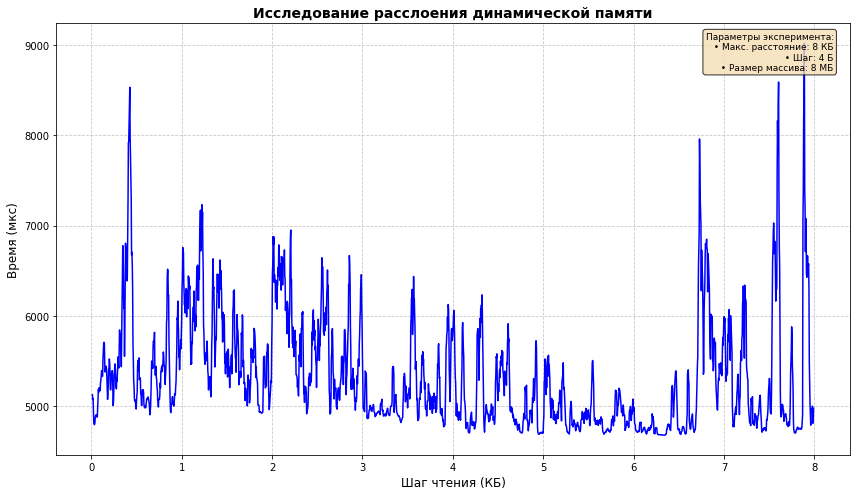

In [2]:
# Эксперимент 1: Исследование расслоения динамической памяти
result1 = await client.execute(
    "memory_stratification",
    {"param1": 8, "param2": 4, "param3": 8, "cacheLine": 0}
)
client.plot_memory_stratification(result1, smooth=True, smooth_window=5)

## Описание эксперимента «Сравнение эффективности ссылочных и векторных структур»

**Цель эксперимента:** оценка влияния зависимости команд по данным на эффективность вычислений.

**Результаты эксперимента:** отношение времени работы алгоритма, использующего зависимые данные, ко времени обработки аналогичного алгоритма обработки независимых данных.

### Описание проблемы

Обработка зависимых данных происходит в тех случаях, когда результат работы одной команды используется в качестве адреса операнда другой. При программировании на языках высокого уровня такими операндами являются указатели, активно используемые при обработке ссылочных структур данных: списков, деревьев, графов.

Обработка данных структур процессорами с длинными конвейерами команд приводит к заметному увеличению времени работы алгоритмов: адрес загружаемого операнда становится известным только после обработки предыдущей команды. В противоположность этому, обработка векторных структур, таких как массивы, позволяет эффективно использовать аппаратные возможности ЭВМ.

### Суть эксперимента

Для сравнения эффективности векторных и списковых структур в эксперименте применяется профилировка кода двух алгоритмов поиска минимального значения. Первый алгоритм использует для хранения данных список, в то время как во втором применяется массив.

Очевидно, что время работы алгоритма поиска минимального значения в списке зависит от его фрагментации, т.е. от среднего расстояния между элементами списка. Таким образом для проведения эксперимента требуется задать следующие настраиваемые параметры:

| № | Диапазон | Описание |
| --- | --- | --- |
| 1 | 1..20 М | Количество элементов в списке |
| 2 | 4..500 K | Максимальная фрагментации списка |
| 3 | 1..10 K | Шаг увеличения фрагментации |

### Код профилируемой программы

```c
// ВЫДЕЛЕНИЕ ПАМЯТИ
struct list {
    struct list *next;
    int val;
};

int a, b, cur, prev, FF, max_list, max_arr;
struct list *list_, *list_t;
int *arr;

// АДРЕС КРАТЕН 64
list_ = (struct list*) _malloc64(Param_[1] * sizeof(struct list));
arr = (int*) _malloc64(Param_[1] * sizeof(int));

// СПИСОК
for (FF = 1; FF <= Param_[2] + 1; FF = FF + Param_[3])
{
    for (a = 0; a < Param_[1]; a++)
    {
        list_[a].next = 0;
        list_[a].val = 0;
    };
    
    prev = 0;
    for (a = 0; a < Param_[1]; a++)
    {
        cur = prev + FF;
        if (cur >= Param_[1]) { cur = cur - Param_[1]; };
        
        while (list_[cur].next)
        {
            if (++cur >= Param_[1]) { cur = cur - Param_[1]; };
        };
        
        list_[prev].next = list_ + cur;
        list_[prev].val = a;
        prev = cur;
    }
    list_[cur].next = 0;
    list_[cur].val = a;

    Start_Count(); // Начало замера времени
    max_list = list_[0].val;
    list_t = list_;
    while (list_t = list_t[0].next)
    {
        if (max_list < list_t[0].val)
        {
            max_list = list_t[0].val;
        }
    };
    Finish_Count(); // Конец замера времени

    // Результат:
    // По оси Х: FF
    // По оси Y: Время (Количество тактов)

    // МАССИВ
    for (a = 0; a < Param_[1]; a++)
    {
        arr[a] = a;
    }
    
    max_arr = arr[0];
    
    Start_Count(); // Начало замера времени
    for (a = 0; a < Param_[1]; a++)
    {
        if (max_arr < arr[a])
            max_arr = arr[a];
    };
    Finish_Count(); // Конец замера времени
    
    // Результат:
    // По оси Х: FF
    // По оси Y: Время (Количество тактов)
}

```

* **Красный график (верхний):** показывает время или количество тактов работы алгоритма, использующего список.
* **Зеленый график (нижний):** показывает время или количество тактов работы алгоритма, использующего массив.
* **Ось абсцисс:** отражает фрагментацию списка.
* **Ось ординат:** отображает время в микросекундах или количество тактов (в зависимости от заданного параметра «Единицы измерения по оси Y»).

После проведения эксперимента на вкладке «Результаты эксперимента» отображается отношение суммарного времени обработки списков с различной степенью фрагментации к суммарному времени обработки массивов.

[[*]] Выполнение функции 'list_vs_array'...

[[+]] Функция выполнена

╭──────────────────────── ВЫВОДЫ ЭКСПЕРИМЕНТА 2: Сравнение ссылочных и векторных структур ────────────────────────╮
│                                                                                                                 │
│   Время работы со списком     233163.00 мкс                                                                     │
│   Время работы с массивом     10037.50 мкс                                                                      │
│   Отношение (список/массив)   23.23x                                                                            │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

[[+]] График сохранён: ../report/img/exp2_list_vs_array.png

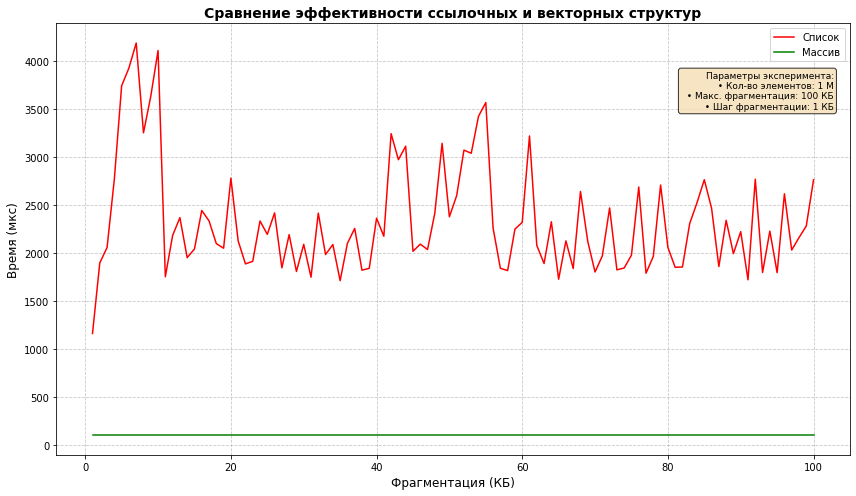

In [3]:
# Эксперимент 2: Сравнение ссылочных и векторных структур
result2 = await client.execute(
    "list_vs_array",
    {"param1": 1, "param2": 100, "param3": 1}
)
client.plot_list_vs_array(result2)

## Описание эксперимента «Исследование эффективности программной предвыборки»

**Цель эксперимента:** выявление способов ускорения вычислений благодаря применению предвыборки данных.

**Исходные данные:** степень ассоциативности и размер TLB данных.

**Результаты эксперимента:**

* отношение времени последовательной обработки блока данных ко времени обработки блока с применением предвыборки;
* время и количество тактов первого обращения к странице данных.

### Описание проблемы

Обработка больших массивов информации сопряжена с открытием большого количества физических страниц памяти. При первом обращении к странице памяти наблюдается увеличенное время доступа к данным. Это связано с необходимостью преобразования логического адреса в физический адрес памяти, а также c открытием страницы динамической памяти и сохранения данных в кэш-памяти.

Преобразование выполняется на основе информации о использованных ранее страницах, содержащейся в TLB буфере процессора. Первое обращение к странице при отсутствии информации в TLB вызывает двойное обращение к оперативной памяти: сначала за информацией из таблицы страниц, а далее за востребованными данными. Предвыборка заключается в заблаговременном проведении всех указанных действий благодаря дополнительному запросу небольшого количества данных из оперативной памяти.

### Суть эксперимента

Эксперимент основан на замере времени двух вариантов подпрограмм последовательного чтения страниц оперативной памяти. В первом варианте выполняется последовательное чтение без дополнительной оптимизации, что приводит к дополнительным двойным обращениям. Во втором варианте перед циклом чтения страниц используется дополнительный цикл предвыборки, обеспечивающий своевременную загрузку информации в TLB данных.

Для проведения эксперимента необходимо задать изменяемые параметры:

| № | Диапазон | Описание |
| --- | --- | --- |
| 1 | 1..4096 Б | Шаг увеличения расстояния между читаемыми данными |
| 2 | 4..8192 K | Размер массива |

Сокращение времени работы алгоритма, использующего предвыборку происходит в том случае, когда информация о востребованных страницах умещается в TLB. Поэтому необходимо определить размер и степень ассоциативности TLB и учитывать ее в алгоритме.

### Код профилируемой программы

```c
// ВЫДЕЛЕНИЕ ПАМЯТИ
p = (int*)_malloc64(Param_[2]); // АДРЕС КРАТЕН 64

// БЕЗ ПРЕДВЫБОРКИ
for (int a = 0; a < Param_[2]; a += Param_[1])
{
    Start_Count(); // Начало замера времени
    x += *(int *) (int(p) + a);
    Finish_Count();// Конец замера времени
    
    // Результат:
    // По оси Х: a
    // По оси Y: Время (Количество тактов)
}

// С ПРЕДВЫБОРКОЙ
for (int i = 0; i < Param_[2]; i += 4*K) 
    x += *(int *)((int)p + i);

// Считаем, что вся информация поместится в TLB
for (int a = 0; a < Param_[2]; a += Param_[1])
{
    Start_Count(); // Начало замера времени
    x += *(int *) (int(p) + a);
    Finish_Count();// Конец замера времени
    
    // Результат:
    // По оси Х: a
    // По оси Y: Время (Количество тактов)
}

```


* **Красный график (верхний с острыми пиками):** показывает время или количество тактов работы алгоритма без предвыборки.
* **Зеленый график (нижний без значимых пиков):** показывает время или количество тактов работы алгоритма с использованием предвыборки.
* **Ось абсцисс:** отражает смещение читаемых данных от начала блока.
* **Ось ординат:** отображает время в микросекундах или количество тактов (в зависимости от заданного параметра «Единицы измерения по оси Y»).

По окончании эксперимента на вкладке «Результаты эксперимента» отображается информация об эффективности предвыборки. Например: «Обработка без загрузки таблицы страниц в TLB производилась в 1,54 раза дольше».

Конкретные значения задержек, характерных для первого обращения к странице, определяются по числовым результатам экспериментов на вкладке «Результаты эксперимента».

[[*]] Выполнение функции 'prefetch'...

[[+]] Функция выполнена

╭───────────────────────── ВЫВОДЫ ЭКСПЕРИМЕНТА 3: Эффективность программной предвыборки ──────────────────────────╮
│                                                                                                                 │
│   Время без предвыборки        44612.00 нс                                                                      │
│   Время с предвыборкой         33557.00 нс                                                                      │
│   Замедление без предвыборки   1.33x                                                                            │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

[[+]] График сохранён: ../report/img/exp3_prefetch.png

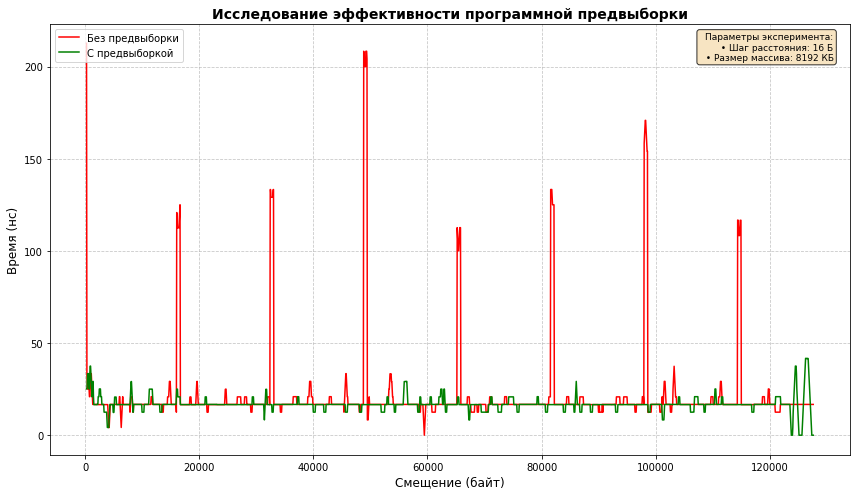

In [4]:
# Эксперимент 3: Исследование эффективности предвыборки
result3 = await client.execute(
    "prefetch",
    {"param1": 16, "param2": 8192}
)
client.plot_prefetch(result3, smooth=True, smooth_window=10)

## Описание эксперимента «Исследование способов эффективного чтения оперативной памяти»

**Цель эксперимента:** исследование возможности ускорения вычислений благодаря использованию структур данных, оптимизирующих механизм чтения оперативной памяти.

**Исходные данные:**

* Адресное расстояние между банками памяти;
* Размер буфера чтения.

**Результаты эксперимента:** отношение времени обработки блока памяти неоптимизированной структуры ко времени обработки блока структуры, обеспечивающей эффективную загрузку и параллельную обработку данных.

### Описание проблемы

При обработке информации, находящейся в нескольких страницах и банках оперативной памяти возникают задержки, связанные с необходимостью открытия и закрытия страниц DRAM памяти. При программировании на языках высокого уровня такая ситуация наблюдается при интенсивной обработке нескольких массивов данных или обработке многомерных массивов. При этом процессоры, в которых реализованы механизмы аппаратной предвыборки, часто не могут организовать эффективную загрузку данных. Кроме этого, объемы запрошенных данных оказываются заметно меньше размера пакета, передаваемого из оперативной памяти. Таким образом, эффективная обработка нескольких векторных структур данных без их дополнительной оптимизации не использует в должной степени возможности аппаратных ресурсов.

Для создания структур данных, оптимизирующих их обработку современными процессорами, требуется максимально исключить несвоевременную передачу данных, т.е. передавать в каждом пакете только востребованную для вычислений информацию. В результате такой оптимизации снижается количество кэш-промахов, сокращается количество открытий и закрытий страниц DRAM-памяти, обеспечивается параллельная обработка данных и выполнение операций загрузки и выгрузки.

### Суть эксперимента

Для сравнения производительности алгоритмов, использующих оптимизированные и неоптимизированные структуры данных используется профилировка кода двух подпрограмм, каждая из которых должна выполнить обработку нескольких блоков оперативной памяти. В алгоритмах обрабатываются двойные слова данных (4 байта), что существенно меньше размера пакета (32 – 128 байт). Неоптимизированный вариант структуры данных представляет собой несколько массивов в оперативной памяти, в то время как оптимизированная структура состоит из чередующихся данных каждого массива.

Для проведения эксперимента необходимо задать изменяемые параметры:

| № | Параметр | Диапазон | Масштаб | Описание |
| --- | --- | --- | --- | --- |
| 1 | № 1 | 1..4 M | — | Размер массива |
| 2 | № 2 | 1..128 | 1 | Количество потоков данных |

### Код профилируемой программы

```c
// ВЫДЕЛЕНИЕ ПАМЯТИ
int *p, *px[32];

for (a = 0; a < Param_[1]; a++)
    px[a] = (int *) _malloc64(Param_[1]); // АДРЕС КРАТЕН 64
    
p = (int*) _malloc64(Param_[1]*Param_[2]); // АДРЕС КРАТЕН 64

// НЕСКОЛЬКО МАССИВОВ
for (r=1; r <= Param_[2]; r++)
{
    x=0;
    Start_Count(); // Начало замера времени
    
    for (int a = 0; a < Param_[1]; a += sizeof(int))
        for(b=0; b < r; b++)
            x += *(int *)((int)px[b] + a );
            
    Finish_Count();// Конец замера времени
    
    // Результат:
    // По оси Х: r
    // По оси Y: Время (Количество тактов)
}

// ОДИН ОПТИМИЗИРОВАННЫЙ МАССИВ
for (r=1; r <= Param_[2]; r++)
{
    x=0;
    Start_Count(); // Начало замера времени
    
    for (int a = 0; a < Param_[1]*r; a += (sizeof(int)*r))
        for(b=0; b < r; b++)
            x += *(int *)((int)p + a + b*sizeof(int));
            
    Finish_Count();// Конец замера времени
    
    // Результат:
    // По оси Х: r
    // По оси Y: Время (Количество тактов)
}

```

* **Красный график (верхний):** показывает время или количество тактов работы алгоритма, использующего неоптимизированную структуру.
* **Зеленый график (нижний):** показывает время (или количество тактов) работы алгоритма с использованием оптимизированной структуры.
* **Ось абсцисс:** отражает количество одновременно обрабатываемых массивов.
* **Ось ординат:** отображает время в микросекундах или количество тактов (в зависимости от заданного параметра «Единицы измерения по оси Y»).


[[*]] Выполнение функции 'memory_read_optimization'...

[[+]] Функция выполнена

╭───────────────────────── ВЫВОДЫ ЭКСПЕРИМЕНТА 4: Оптимизация чтения оперативной памяти ──────────────────────────╮
│                                                                                                                 │
│   Время с отдельными массивами              5102660.00 мкс                                                      │
│   Время с оптимизированным                  2122920.00 мкс                                                      │
│   Замедление неоптимизированной структуры   2.40x                                                               │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

[[+]] График сохранён: ../report/img/exp4_memory_read_optimization.png

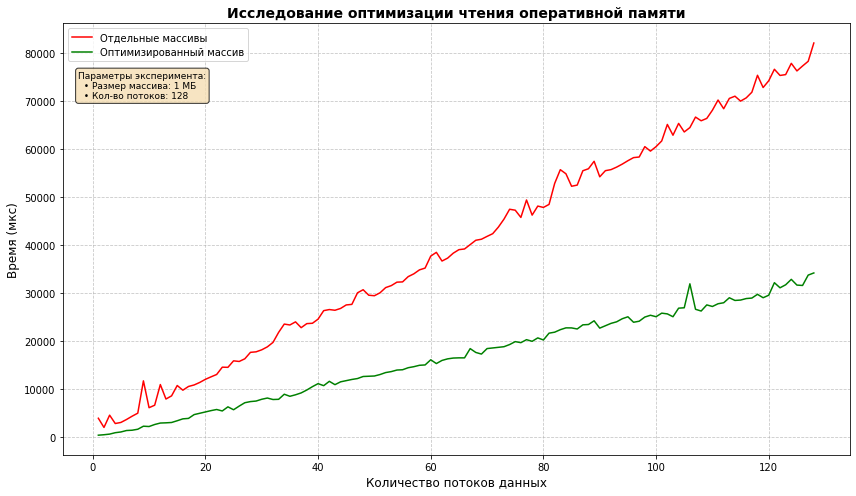

In [5]:
# Эксперимент 4: Исследование оптимизации чтения памяти
result4 = await client.execute(
    "memory_read_optimization",
    {"param1": 1, "param2": 128}
)
client.plot_memory_read_optimization(result4)

## Описание эксперимента «Исследование конфликтов в кэш-памяти»

**Цель эксперимента:** исследование влияния конфликтов кэш-памяти на эффективность вычислений.

**Исходные данные:**

* Размер банка кэш-памяти данных первого и второго уровня;
* степень ассоциативности кэш-памяти первого и второго уровня;
* размер линейки кэш-памяти первого и второго уровня.

**Результаты эксперимента:** отношение времени обработки массива с конфликтами в кэш-памяти ко времени обработки массива без конфликтов.

### Описание проблемы

Наборно-ассоциативная кэш-память состоит из линеек данных, организованных в несколько независимых банков. Выбор банка для каждой порции кэшируемых данных выполняется по ассоциативному принципу, т.е. из условия улучшения представительности выборки, в то время как целевая линейка в каждом из банков жестко определяется по младшей части физического адреса. Совокупность таких линеек всех банков принято называть набором.

Таким образом, попытка читать данные из оперативной памяти с шагом, кратным размеру банка, приводит к их помещению в один и тот же набор. Если же количество запросов превосходит степень ассоциативности кэш-памяти, т.е. количество банков или количество линеек в наборе, то наблюдается постоянное вытеснение данных из кэш-памяти, причем больший ее объем остается незадействованным.

### Суть эксперимента

Для определения степени влияния конфликтов в кэш-памяти на эффективность вычислений используется профилировка двух процедур чтения и обработки данных. Первая процедура построена таким образом, что чтение данных выполняется с шагом, кратным размеру банка. Это порождает постоянные конфликты в кэш-памяти. Вторая процедура оптимизирует размещение данных в кэш с помощью задания смещения востребованных данных на некоторый шаг, достаточный для выбора другого набора. Этот шаг соответствует размеру линейки.

Для проведения эксперимента необходимо задать изменяемые параметры:

| № | Диапазон | Описание |
| --- | --- | --- |
| 1 | 1..256 К | Размер банка кэш-памяти |
| 2 | 1..128 б | Размер линейки кэш-памяти |
| 3 | 2..512 | Количество читаемых линеек |

### Код профилируемой программы

```c
// ВЫДЕЛЕНИЕ ПАМЯТИ
// АДРЕС КРАТЕН 64
p = (int *)_malloc64((Param_[1]+Param_[2])*Param_[3]);

// ЧТЕНИЕ КЭШ-ПАМЯТИ С КОНФЛИКТАМИ
for(int a=0; a < Param_[3]; a++)
{
    Start_Count(); // Начало замера времени
    x += *(int *)((int)p + a*Param_[1]);
    Finish_Count();// Конец замера времени
    
    // Результат:
    // По оси Х: a*Param_[1]
    // По оси Y: Время (Количество тактов)
}

// ЧТЕНИЕ КЭШ-ПАМЯТИ БЕЗ КОНФЛИКТОВ
for(int a=0; a < Param_[3]; a++)
{
    Start_Count(); // Начало замера времени
    x += *(int *)((int)p + a*(Param_[1]+Param_[2]));
    Finish_Count();// Конец замера времени
    
    // Результат:
    // По оси Х: a*(Param_[1]+Param_[2])
    // По оси Y: Время (Количество тактов)
}

```

* **Красный график (верхний):** показывает время или количество тактов работы процедуры, читающей данные с конфликтами в кэш-памяти.
* **Зеленый график (нижний):** показывает время или количество тактов работы процедуры, не вызывающей конфликтов в кэш-памяти.
* **Ось абсцисс:** отражает смещение читаемой ячейки от начала блока данных.
* **Ось ординат:** отображает время в микросекундах или количество тактов (в зависимости от заданного параметра «Единицы измерения по оси Y»).

По окончании эксперимента на вкладке «Результаты эксперимента» отображается информация об эффективности чтения без конфликтов кэш-памяти. Например: «Чтение с конфликтом банков производилось в 12,8 раза дольше».

[[*]] Выполнение функции 'cache_conflicts'...

[[+]] Функция выполнена

╭───────────────────────────────── ВЫВОДЫ ЭКСПЕРИМЕНТА 5: Конфликты в кэш-памяти ─────────────────────────────────╮
│                                                                                                                 │
│   Время с конфликтами         4.90 мкс                                                                          │
│   Время без конфликтов        1.07 мкс                                                                          │
│   Замедление при конфликтах   4.59x                                                                             │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

[[+]] График сохранён: ../report/img/exp5_cache_conflicts.png

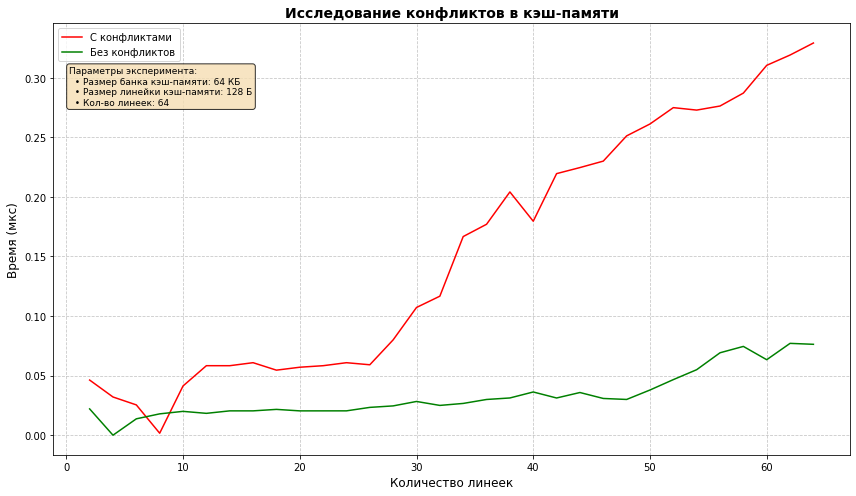

In [6]:
# Эксперимент 5: Исследование конфликтов в кэш-памяти
result5 = await client.execute(
    "cache_conflicts",
    {"param1": 0, "param2": 0, "param3": 64}
)
client.plot_cache_conflicts(result5)

## Описание эксперимента «Сравнение алгоритмов сортировки»

**Цель эксперимента:** исследование способов эффективного использования памяти и выявление наиболее эффективных алгоритмов сортировки, применимых в вычислительных системах.

**Исходные данные:**

* количество процессоров вычислительной системы;
* размер пакета;
* количество элементов в массиве;
* разрядность элементов массива.

**Результаты эксперимента:** отношение времени сортировки массива алгоритмом QuickSort ко времени сортировки алгоритмом Radix-Counting Sort и ко времени сортировки Radix-Counting Sort, оптимизированной под 8-процессорную вычислительную систему.

### Описание проблемы

Существует несколько десятков алгоритмов сортировки. Их можно классифицировать по таким критериям, как:

* **Назначение:** внутренняя и внешняя сортировки.
* **Вычислительная сложность:** алгоритмы со сложностями , , , .
* **Емкостная сложность:** алгоритмы, требующие и не требующие дополнительного массива.
* **Возможность распараллеливания:** не распараллеливаемые, ограниченно распараллеливаемые, полностью распараллеливаемые.
* **Принцип определения порядка:** алгоритмы, использующие парные сравнения и не использующие их.

Среди известных алгоритмов не выделено однозначного лидера. Считается, что хорошие результаты обеспечивает алгоритм внутренней сортировки **QuickSort**, имеющий вычислительную сложность в среднем  и  в худшем. Теоретически доказано, что алгоритмы, использующие парные сравнения, не могут иметь вычислительную сложность меньшую, чем .

Особый интерес представляют алгоритмы, не использующие парные сравнения: Counting Sort, Radix Sort и другие. В эксперименте рассматривается алгоритм, являющийся сочетанием Counting Sort и Radix Sort, лишенный некоторых их недостатков. Оценки вычислительной сложности **Radix-Counting** алгоритма составляют , то есть менее чем линейная. Однако сложность зависит от настройки на разрядность чисел. Для многопроцессорных ЭВМ требуется оптимизированная стратегия, учитывающая количество процессоров и пакетный режим обмена с памятью.

### Суть эксперимента

Эксперимент основан на замере времени трех вариантов алгоритмов сортировки:

1. Quick Sort.
2. Radix-Counting Sort.
3. Оптимизированный Radix-Counting Sort.

Для проведения эксперимента необходимо задать изменяемые параметры:

| № | Параметр | Диапазон | Масштаб | Описание |
| --- | --- | --- | --- | --- |
| 1 | № 1 | 1..20 M | — | Количество 64-х разрядных элементов массивов |
| 2 | № 2 | 4..1024 K | — | Шаг увеличения размера массива |

### Код профилируемой программы

```c
// ==========================================
// Алгоритм QUICK-SORT
// ==========================================

// Выделение памяти
QMAS = (unsigned __int64 *) _malloc128(Param_[0]*sizeof(unsigned __int64));
RMAS = (unsigned __int8 *) _malloc128(Param_[0]*sizeof(unsigned __int64));
TMP = (unsigned __int8 *) _malloc128(Param_[0]*sizeof(unsigned __int64));
TMP_A64 = (unsigned __int64 *)RMAS;
TMP_B64 = (unsigned __int64 *)QMAS;

// Основной цикл замеров QuickSort
for (b = Param_[1]; b <= Param_[0]; b += Param_[1])
{
    Start_Count(); // Начало замера времени
    QuickSort(QMAS, 0, b-1);
    Finish_Count();// Конец замера времени
    
    // Результат:
    // По оси Х: b*Param_[1]
    // По оси Y: Время (Количество тактов)
}

// Реализация функции QuickSort
void QuickSort (unsigned __int64* A, int iLo, int iHi)
{
    int Lo, Hi;
    unsigned __int64 Mid, T;
    Lo = iLo;
    Hi = iHi;
    Mid = A[(Lo + Hi)>>1];
    do
    { 
        while (A[Lo] < Mid) {Lo++;};
        while (A[Hi] > Mid) {Hi--;};
        if (Lo <= Hi)
        {
            T = A[Lo];
            A[Lo] = A[Hi];
            A[Hi] = T;
            Lo++;
            Hi--;
        }
    } while (Lo < Hi);
    
    if (Hi > iLo) {QuickSort(A, iLo, Hi);};
    if (Lo < iHi) {QuickSort(A, Lo, iHi);};
}

// ==========================================
// Алгоритм RADIX-COUNTING (размерность всех групп разрядов: 8 бит)
// ==========================================

for (b = Param_[1]; b <= Param_[0]; b += Param_[1])
{
    TMP_A64 = (unsigned __int64 *)RMAS;
    TMP_B64 = (unsigned __int64 *)TMP;
    
    Start_Count(); // Начало замера времени
    
    for (i=0; i<=7; i++) {
        // Заполнить массив с нулями
        for (j=0; j<=255; j++) {c[j]=0;};
        
        // Накопить в массиве C количества повторений разрядов
        for (j=0; j<b; j++) {c[RMAS[i+j*8]]++;};
        
        // Сохранить в массиве C количество чисел, меньших данного
        for (j=1; j<=255; j++) {c[j] += c[j-1];};
        
        for (j=b-1; j>=0; j--) {
            // Модифицировать массив C для данного значения разряда
            c[RMAS[i+j*8]]--;
            // Записать число из исходного массива во временный массив
            temp = TMP_A64[j];
            TMP_B64[c[RMAS[i+j*8]]] = temp; 
        }
        
        // Подготовиться к сортировке по следующему разряду
        p=TMP;
        TMP=RMAS;
        RMAS=p;
        TMP_A64 = (unsigned __int64 *)RMAS;
        TMP_B64 = (unsigned __int64 *)TMP;
    }
    
    Finish_Count();// Конец замера времени
    
    // Результат:
    // По оси Х: b*Param_[1]
    // По оси Y: Время (Количество тактов)
}

// ==========================================
// Алгоритм RADIX-COUNTING, оптимизированный под 8 процессоров
// ==========================================

for (b = Param_[1]; b <= Param_[0]; b += Param_[1])
{
    TMP_A64 = (unsigned __int64 *)RMAS;
    TMP_B64 = (unsigned __int64 *)TMP;
    
    Start_Count(); // Начало замера времени
    
    for (i=0; i<256*8; i++) {copt[i]=0;};
    
    j=0;
    for (k=0; k<b; k++) {
        // Параллельное обращение к 8 частям copt
        copt[RMAS[j+0]*8+0]++;
        copt[RMAS[j+1]*8+1]++;
        copt[RMAS[j+2]*8+2]++;
        copt[RMAS[j+3]*8+3]++;
        copt[RMAS[j+4]*8+4]++;
        copt[RMAS[j+5]*8+5]++;
        copt[RMAS[j+6]*8+6]++;
        copt[RMAS[j+7]*8+7]++;
        j+=8;
    }
    
    for (j=1; j<256; j++) {
        // Параллельное обращение к 8 частям copt
        copt[j*8+0] += copt[j*8-8+0];
        copt[j*8+1] += copt[j*8-8+1];
        copt[j*8+2] += copt[j*8-8+2];
        copt[j*8+3] += copt[j*8-8+3];
        copt[j*8+4] += copt[j*8-8+4];
        copt[j*8+5] += copt[j*8-8+5];
        copt[j*8+6] += copt[j*8-8+6];
        copt[j*8+7] += copt[j*8-8+7];
    }
    
    for (i=0; i<=7; i++)
    {
        for (j=b-1; j>=0; j--)
        {
            ii=(RMAS[j*8+i])*8+i;
            jj=--copt[ii];
            temp = TMP_A64[j];
            TMP_B64[jj] = temp;
        }
        p=TMP;
        TMP=RMAS;
        RMAS=p;
        TMP_A64 = (unsigned __int64 *)RMAS;
        TMP_B64 = (unsigned __int64 *)TMP;
    }
    
    Finish_Count();// Конец замера времени
    
    // Результат:
    // По оси Х: b*Param_[1]
    // По оси Y: Время (Количество тактов)
}

```

* **Фиолетовый график (верхний):** показывает время или количество тактов работы алгоритма QuickSort.
* **Красный график (средний):** показывает время или количество тактов работы неоптимизированного алгоритма Radix-Counting.
* **Зеленый график (нижний):** показывает время или количество тактов работы оптимизированного под 8-процессорную вычислительную систему алгоритма Radix-Counting.
* **Ось абсцисс:** отражает количество 64-разрядных элементов сортируемых массивов.
* **Ось ординат:** отображает время в микросекундах или количество тактов (в зависимости от заданного параметра «Единицы измерения по оси Y»).

По окончании эксперимента на вкладке «Результаты эксперимента» отображается информация об эффективности алгоритмов сортировки.

*Например: «QuickSort работал в 1,4161678 раз дольше Radix-Counting Sort. QuickSort работал в 1,7967811 раз дольше Radix-Counting Sort, оптимизированного под 8-процессорную ЭВМ».*

[[*]] Выполнение функции 'sorting_algorithms'...

[[+]] Функция выполнена

╭──────────────────────────── ВЫВОДЫ ЭКСПЕРИМЕНТА 6: Сравнение алгоритмов сортировки ─────────────────────────────╮
│                                                                                                                 │
│   Время QuickSort                 7756500.00 мкс                                                                │
│   Время Radix-Counting            1662030.00 мкс                                                                │
│   Время Radix-Counting (оптим.)   1704270.00 мкс                                                                │
│   QuickSort vs Radix-Counting     4.67x                                                                         │
│   QuickSort vs Radix (оптим.)     4.55x                                                                         │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

[[+]] График сохранён: ../report/img/exp6_sorting_algorithms.png

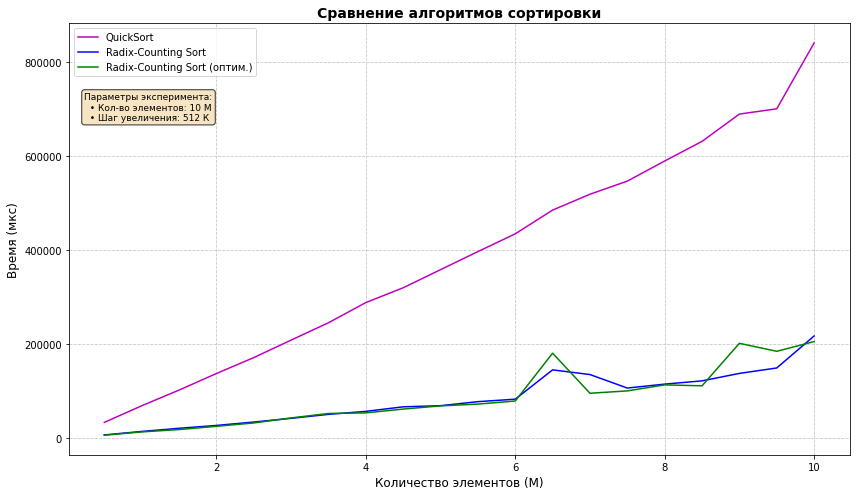

In [7]:
# Эксперимент 6: Сравнение алгоритмов сортировки
result6 = await client.execute(
    "sorting_algorithms",
    {"param1": 10, "param2": 512}
)
client.plot_sorting_algorithms(result6)

---
## Контрольные вопросы

1. Назовите причины расслоения оперативной памяти.
2. Как в современных процессорах реализована аппаратная предвыборка?
3. Какая информация хранится в TLB?
4. Какой тип ассоциативной памяти используется в кэш-памяти второго уровня современных ЭВМ и почему?
5. Приведите пример программной предвыборки.

In [8]:
# Закрытие соединения
await client.disconnect()

[[*]] Отключено от сервера